In [13]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def kmeans_clustering(audio_features_df, num_clusters, audio_feature_columns):
    # Select the columns for clustering
    data = audio_features_df[audio_feature_columns]

    # Create a K-Means model
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)

    # Fit the K-Means model to the data
    kmeans.fit(data)

    # Assign cluster labels to the original DataFrame
    audio_features_df['cluster_label'] = kmeans.labels_

    # Calculate the Calinski-Harabasz score
    calinski_score = calinski_harabasz_score(data, kmeans.labels_)

    return audio_features_df, calinski_score


In [16]:
songs_df=pd.read_csv(r'.\data\not_top100.csv')

In [17]:
songs_df.head()

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot
0,Mercury: Retrograde,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,...,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,N
1,Pathology,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,...,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,N
2,Symbiote,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,...,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,N
3,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,...,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,N
4,Venom,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,...,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,N


In [103]:
#sampled_df = songs_df.sample(n=1000, random_state=42)

songs_df.drop_duplicates(subset='uri', keep='first', inplace=True)

sampled_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot,cluster_label
3533,Deep South,0.632,0.849,8,-8.641,0,0.0637,0.14000,0.865000,0.1090,...,audio_features,7oMFpfiP2K4frK1rhjMC2H,spotify:track:7oMFpfiP2K4frK1rhjMC2H,https://api.spotify.com/v1/tracks/7oMFpfiP2K4f...,https://api.spotify.com/v1/audio-analysis/7oMF...,247130,4,Dark Trap,N,2
3616,Touch,0.545,0.498,2,-7.459,1,0.1930,0.43600,0.902000,0.2910,...,audio_features,6nS3ZVJ0ARNdd4uMQqPUoa,spotify:track:6nS3ZVJ0ARNdd4uMQqPUoa,https://api.spotify.com/v1/tracks/6nS3ZVJ0ARNd...,https://api.spotify.com/v1/audio-analysis/6nS3...,197701,4,Dark Trap,N,1
14340,GOOBA,0.611,0.688,1,-5.688,1,0.3410,0.02640,0.000000,0.2510,...,audio_features,4NhDYoQTYCdWHTvlbGVgwo,spotify:track:4NhDYoQTYCdWHTvlbGVgwo,https://api.spotify.com/v1/tracks/4NhDYoQTYCdW...,https://api.spotify.com/v1/audio-analysis/4NhD...,132303,4,Rap,N,2
16301,Always On Time,0.839,0.706,5,-6.119,0,0.2310,0.19000,0.000000,0.2050,...,audio_features,4YA7nxDtAVE2R1Eryx7uRu,spotify:track:4YA7nxDtAVE2R1Eryx7uRu,https://api.spotify.com/v1/tracks/4YA7nxDtAVE2...,https://api.spotify.com/v1/audio-analysis/4YA7...,245373,4,RnB,N,0
7204,Vodka Sauce Freestyle!,0.916,0.776,9,-6.927,1,0.1830,0.06560,0.000000,0.0963,...,audio_features,5X2bCEwDo89Rg1haCjJElP,spotify:track:5X2bCEwDo89Rg1haCjJElP,https://api.spotify.com/v1/tracks/5X2bCEwDo89R...,https://api.spotify.com/v1/audio-analysis/5X2b...,110222,4,Underground Rap,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18835,Da Bichez,0.740,0.552,6,-10.193,1,0.3100,0.00293,0.000000,0.1100,...,audio_features,7jM8Kk1CPcX6gyeWZjarBT,spotify:track:7jM8Kk1CPcX6gyeWZjarBT,https://api.spotify.com/v1/tracks/7jM8Kk1CPcX6...,https://api.spotify.com/v1/audio-analysis/7jM8...,232307,4,Hiphop,N,1
10899,Boy You're Wrong,0.720,0.916,4,-2.807,0,0.1780,0.00103,0.000003,0.2640,...,audio_features,4iownB9gM7qfyNqyj6Ssx6,spotify:track:4iownB9gM7qfyNqyj6Ssx6,https://api.spotify.com/v1/tracks/4iownB9gM7qf...,https://api.spotify.com/v1/audio-analysis/4iow...,150961,4,Trap Metal,N,0
12788,How You Remind Me,0.612,0.698,0,-7.224,1,0.0357,0.24800,0.000003,0.1190,...,audio_features,00tB8c71eTcG5jV7PhuF4Q,spotify:track:00tB8c71eTcG5jV7PhuF4Q,https://api.spotify.com/v1/tracks/00tB8c71eTcG...,https://api.spotify.com/v1/audio-analysis/00tB...,245360,4,Emo,N,2
4505,Reasons,0.268,0.721,9,-7.331,0,0.1300,0.26300,0.000000,0.3920,...,audio_features,0kdOP1fzdJWgsWJUVdu1nU,spotify:track:0kdOP1fzdJWgsWJUVdu1nU,https://api.spotify.com/v1/tracks/0kdOP1fzdJWg...,https://api.spotify.com/v1/audio-analysis/0kdO...,206957,4,Dark Trap,N,2


In [104]:
# Assuming audio_features_df is your audio features DataFrame and audio_feature_columns is a list of column names for clustering.
num_clusters = 3  # Set the number of clusters you want
#audio_feature_columns=["danceability","energy"]
audio_feature_columns=["danceability","tempo"]
clustered_df, calinski_score = kmeans_clustering(songs_df, num_clusters, audio_feature_columns)

C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be

In [105]:
clustered_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot,cluster_label,genre_enc
0,Mercury: Retrograde,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,0,N,1,0
1,Pathology,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,0,N,0,0
2,Symbiote,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,0,N,2,0
3,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,0,N,2,0
4,Venom,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,0,N,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21485,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,...,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,2,N,1,2
21486,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,...,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,2,N,1,2
21487,'94,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,...,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,2,N,1,2
21488,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,...,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,2,N,2,2


In [106]:
calinski_score

52975.29647284744

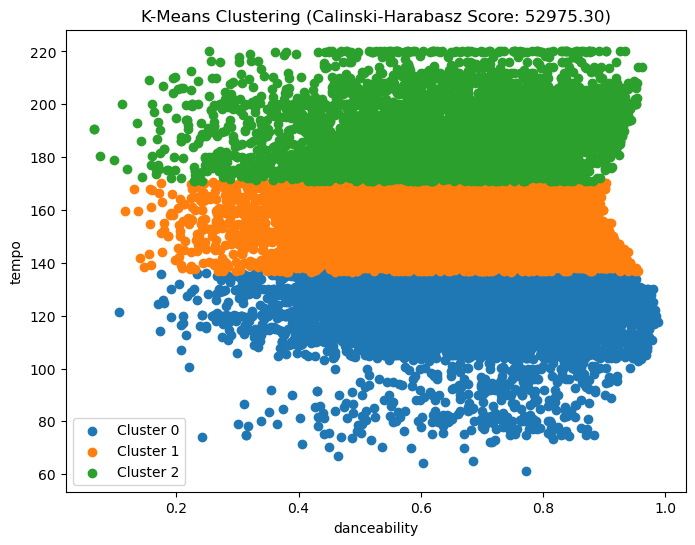

In [107]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

for cluster_label in range(num_clusters):
    cluster_data = clustered_df[clustered_df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[audio_feature_columns[0]], cluster_data[audio_feature_columns[1]], label=f'Cluster {cluster_label}')

plt.title(f'K-Means Clustering (Calinski-Harabasz Score: {calinski_score:.2f})')
plt.xlabel(audio_feature_columns[0])
plt.ylabel(audio_feature_columns[1])
plt.legend()
plt.show()

In [108]:
# 'genre' is the column we want to one-hot encode

# Perform One-Hot Encoding on the 'genre' column
#audio_features_df_enc = pd.get_dummies(songs_df, columns=['genre'], prefix=['genre'])

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'genre' column
songs_df['genre_enc'] = label_encoder.fit_transform(songs_df['genre'])
songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot,cluster_label,genre_enc
0,Mercury: Retrograde,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,0,N,1,0
1,Pathology,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,0,N,0,0
2,Symbiote,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,0,N,2,0
3,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,0,N,2,0
4,Venom,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,0,N,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21485,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,...,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,2,N,1,2
21486,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,...,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,2,N,1,2
21487,'94,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,...,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,2,N,1,2
21488,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,...,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,2,N,2,2


In [109]:
num_clusters = 3  # Set the number of clusters you want
#audio_feature_columns=["danceability","energy"]
audio_feature_columns=["danceability","genre_enc"]
clustered_df, calinski_score = kmeans_clustering(songs_df, num_clusters, audio_feature_columns)

C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be

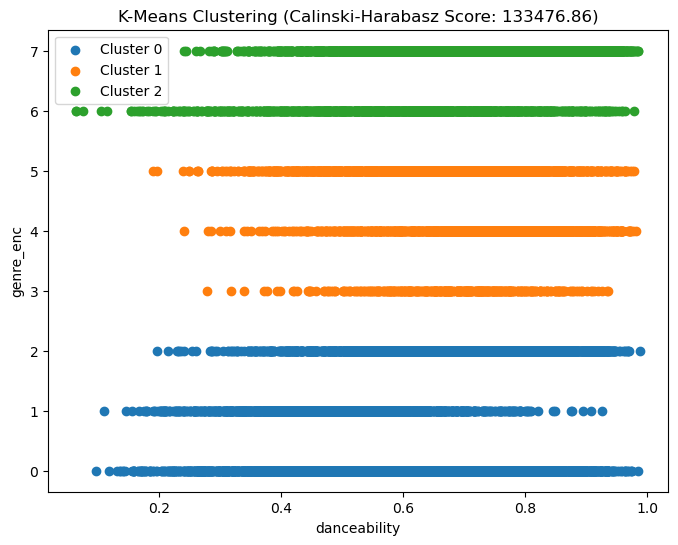

In [110]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

for cluster_label in range(num_clusters):
    cluster_data = clustered_df[clustered_df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[audio_feature_columns[0]], cluster_data[audio_feature_columns[1]], label=f'Cluster {cluster_label}')

plt.title(f'K-Means Clustering (Calinski-Harabasz Score: {calinski_score:.2f})')
plt.xlabel(audio_feature_columns[0])
plt.ylabel(audio_feature_columns[1])
plt.legend()
plt.show()

recomender

In [111]:
def song_recommender(audio_features_df, songs, num_clusters, audio_feature_columns, num_recommendations=5):
    # Ensure that 'genre' is label encoded
    label_encoder = LabelEncoder()
    audio_features_df['genre'] = label_encoder.fit_transform(audio_features_df['genre'])
    
    # Perform clustering
    clustered_df, _ = kmeans_clustering(audio_features_df, num_clusters, audio_feature_columns)
    
    # Find the cluster for each song in the input list
    song_clusters = []
    for song in songs:
        song_data = audio_features_df[audio_features_df['uri'] == song['uri']]
        if not song_data.empty:
            cluster = int(song_data['cluster_label'])
            song_clusters.append(cluster)
    
    # Recommend songs from the same cluster
    recommendations = []
    for cluster in song_clusters:
        cluster_songs = clustered_df[clustered_df['cluster_label'] == cluster]
        if len(cluster_songs) > num_recommendations:
            cluster_songs = cluster_songs.sample(num_recommendations)
        recommendations.extend(cluster_songs['uri'].tolist())
    
    return recommendations



In [112]:
songs=songs_df.sample(n=5, random_state=42)
songs

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot,cluster_label,genre_enc
9058,Man Down,0.566,0.558,9,-6.906,1,0.0295,0.093600,0.94000,0.371,...,4VIpr7JZaZciJG4jPCTHAK,spotify:track:4VIpr7JZaZciJG4jPCTHAK,https://api.spotify.com/v1/tracks/4VIpr7JZaZci...,https://api.spotify.com/v1/audio-analysis/4VIp...,117072,4,7,N,2,7
21403,Why,0.670,0.634,8,-5.896,0,0.0311,0.010500,0.00142,0.312,...,4cBRXZl34eCJ0HfXKiXFou,spotify:track:4cBRXZl34eCJ0HfXKiXFou,https://api.spotify.com/v1/tracks/4cBRXZl34eCJ...,https://api.spotify.com/v1/audio-analysis/4cBR...,313200,4,2,N,0,2
10406,Sexy,0.970,0.502,1,-9.974,1,0.0783,0.000856,0.00000,0.087,...,15v2IdrO3Mk8HYXMo0M7gM,spotify:track:15v2IdrO3Mk8HYXMo0M7gM,https://api.spotify.com/v1/tracks/15v2IdrO3Mk8...,https://api.spotify.com/v1/audio-analysis/15v2...,192873,4,7,N,2,7
251,MiAMi (feat. Gunna),0.674,0.862,7,-3.400,1,0.2310,0.018900,0.00000,0.113,...,3Z52thjMFyjbF5L35dcBwG,spotify:track:3Z52thjMFyjbF5L35dcBwG,https://api.spotify.com/v1/tracks/3Z52thjMFyjb...,https://api.spotify.com/v1/audio-analysis/3Z52...,244470,4,0,N,0,0
6129,Drug$ III,0.785,0.260,2,-14.511,0,0.1720,0.611000,0.00000,0.115,...,18Inxa7cqP7dwWrZ0XcgJc,spotify:track:18Inxa7cqP7dwWrZ0XcgJc,https://api.spotify.com/v1/tracks/18Inxa7cqP7d...,https://api.spotify.com/v1/audio-analysis/18In...,243755,4,7,N,2,7


In [113]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

def cluster_audio_features(audio_features_df, audio_feature_columns, num_clusters):
    # Select the columns for clustering, excluding 'uri' and 'song_name'
    data = audio_features_df[audio_feature_columns]

    # Create a K-Means model
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)

    # Fit the K-Means model to the data
    kmeans.fit(data)

    # Assign cluster labels to the original DataFrame
    audio_features_df['cluster_label'] = kmeans.labels_

    return audio_features_df

def build_recommendation_model(clustered_df):
    # Create a k-NN model, excluding 'uri' and 'song_name'
    knn = NearestNeighbors(n_neighbors=4, metric='euclidean', n_jobs=-1)

    # Fit the k-NN model to the clustered data, excluding 'uri' and 'song_name'
    knn.fit(clustered_df[clustered_df.columns.difference(['uri', 'song_name', 'cluster_label'])])

    return knn

def song_recommender(clustered_df, recommendation_model, songs, num_recommendations=3):
    song_clusters = []
    for _, song in songs.iterrows():
        song_uri = song['uri']
        song_data = clustered_df[clustered_df['uri'] == song_uri]
        if not song_data.empty:
            cluster = int(song_data['cluster_label'].iloc[0])
            song_clusters.append(cluster)

    recommendations = []
    for cluster in song_clusters:
        cluster_songs = clustered_df[clustered_df['cluster_label'] == cluster]

        if len(cluster_songs) > num_recommendations:
            cluster_data = cluster_songs[clustered_df.columns.difference(['uri', 'song_name', 'cluster_label'])]
            indices = recommendation_model.kneighbors(cluster_data, num_recommendations + 1, return_distance=False)

            added_recommendations = 0
            for index in indices[0][1:]:
                if added_recommendations >= num_recommendations:
                    break
                if index < len(cluster_songs):
                    recommendations.append(cluster_songs.iloc[index]['uri'])
                    added_recommendations += 1

    return recommendations


def calculate_recommendation_score(recommendations, audio_features_df):
    recommendation_scores = []

    for uri in recommendations:
        # Find the song data in the audio_features_df
        song_data = audio_features_df[audio_features_df['uri'] == uri]

        # Calculate a score based on audio features (e.g., the mean of specific features)
        if not song_data.empty:
            # Customize the scoring function based on your preferences
            score = (song_data['danceability'] + song_data['energy']) / 2.0
            recommendation_scores.append((uri, score))

    # Sort the recommendations by score in descending order
    recommendation_scores.sort(key=lambda x: x[1], reverse=True)

    return recommendation_scores

def song_recommender_with_scores(clustered_df, recommendation_model, songs, audio_features_df, num_recommendations=3):
    song_clusters = []
    for _, song in songs.iterrows():
        song_uri = song['uri']
        song_data = clustered_df[clustered_df['uri'] == song_uri]
        if not song_data.empty:
            cluster = int(song_data['cluster_label'].iloc[0])
            song_clusters.append(cluster)

    recommendations = []
    for cluster in song_clusters:
        cluster_songs = clustered_df[clustered_df['cluster_label'] == cluster]

        if len(cluster_songs) > num_recommendations:
            cluster_data = cluster_songs[clustered_df.columns.difference(['uri', 'song_name', 'cluster_label'])]
            indices = recommendation_model.kneighbors(cluster_data, num_recommendations + 1, return_distance=False)

            added_recommendations = 0
            for index in indices[0][1:]:
                if added_recommendations >= num_recommendations:
                    break
                if index < len(cluster_songs):
                    recommendations.append(cluster_songs.iloc[index]['uri'])
                    added_recommendations += 1

    # Calculate scores for recommendations
    recommendation_scores = calculate_recommendation_score(recommendations, audio_features_df)

    return recommendation_scores


def drop_columns(dataframe, columns_to_drop):
    """
    Drops specified columns from a DataFrame.
    
    Parameters:
        dataframe (pandas.DataFrame): The DataFrame from which columns should be dropped.
        columns_to_drop (list): List of column names to drop from the DataFrame.

    Returns:
        pandas.DataFrame: A new DataFrame with the specified columns dropped.
    """
    return dataframe.drop(columns=columns_to_drop)



In [114]:
# Example usage:
# Assuming songs_df is your DataFrame and columns_to_remove is a list of column names to be dropped.

#columns_to_remove = ["id","uri","track_href","analysis_url","duration_ms","time_signature", "hot", "song_name","genre","type"]
columns_to_remove = ["id","track_href","analysis_url","duration_ms","time_signature", "hot", "genre","type"]

songs_df_dropped = drop_columns(songs_df, columns_to_remove)
songs_4model = drop_columns(songs, columns_to_remove)
songs_4model

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,cluster_label,genre_enc
9058,Man Down,0.566,0.558,9,-6.906,1,0.0295,0.093600,0.94000,0.371,0.0556,132.955,spotify:track:4VIpr7JZaZciJG4jPCTHAK,2,7
21403,Why,0.670,0.634,8,-5.896,0,0.0311,0.010500,0.00142,0.312,0.6280,150.992,spotify:track:4cBRXZl34eCJ0HfXKiXFou,0,2
10406,Sexy,0.970,0.502,1,-9.974,1,0.0783,0.000856,0.00000,0.087,0.5500,121.979,spotify:track:15v2IdrO3Mk8HYXMo0M7gM,2,7
251,MiAMi (feat. Gunna),0.674,0.862,7,-3.400,1,0.2310,0.018900,0.00000,0.113,0.3570,160.073,spotify:track:3Z52thjMFyjbF5L35dcBwG,0,0
6129,Drug$ III,0.785,0.260,2,-14.511,0,0.1720,0.611000,0.00000,0.115,0.5510,127.963,spotify:track:18Inxa7cqP7dwWrZ0XcgJc,2,7


In [115]:
# Example usage:
# Assuming audio_features_df is your audio features DataFrame
# songs is a list of 3-5 songs with their audio features
# Choose the number of clusters for audio feature pairs
num_clusters = 5
audio_feature_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'genre_enc']

# Perform clustering
clustered_df = cluster_audio_features(songs_df_dropped, audio_feature_columns, num_clusters)

# Build a recommendation model
recommendation_model = build_recommendation_model(clustered_df)

# Recommend songs
recommendations = song_recommender(clustered_df, recommendation_model, songs_4model)
print(recommendations)

C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be

['spotify:track:5Xl4jZQFPGElFil9HDkb04', 'spotify:track:3ZMliiKyb3V7tL1XMRfq4c', 'spotify:track:0AQXOzjEG2ofwGrDyqUY7H', 'spotify:track:2rFaYm6GojPdFxQzMwItMu', 'spotify:track:3ZMliiKyb3V7tL1XMRfq4c', 'spotify:track:0AQXOzjEG2ofwGrDyqUY7H', 'spotify:track:2rFaYm6GojPdFxQzMwItMu', 'spotify:track:7b6Lp3fS8KjHY7LSxX5eCF']


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [117]:
# Example usage:
recommended_songs_df = find_songs_by_uris(songs_df, recommendations)
recommended_songs_df.shape

(5, 23)

In [119]:
recommended_songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot,cluster_label,genre_enc
74,Seppuku (feat. Suicideboy$ & Jgrxxn),0.814,0.740,10,-5.438,0,0.0947,0.110000,0.000023,0.120,...,0AQXOzjEG2ofwGrDyqUY7H,spotify:track:0AQXOzjEG2ofwGrDyqUY7H,https://api.spotify.com/v1/tracks/0AQXOzjEG2of...,https://api.spotify.com/v1/audio-analysis/0AQX...,183937,4,0,N,0,0
1581,I Lost Carol,0.630,0.599,7,-7.939,0,0.2350,0.209000,0.000278,0.110,...,2rFaYm6GojPdFxQzMwItMu,spotify:track:2rFaYm6GojPdFxQzMwItMu,https://api.spotify.com/v1/tracks/2rFaYm6GojPd...,https://api.spotify.com/v1/audio-analysis/2rFa...,177874,4,0,N,0,0
4182,Breaking the Law,0.635,0.891,7,-3.081,1,0.0369,0.000013,0.754000,0.304,...,3ZMliiKyb3V7tL1XMRfq4c,spotify:track:3ZMliiKyb3V7tL1XMRfq4c,https://api.spotify.com/v1/tracks/3ZMliiKyb3V7...,https://api.spotify.com/v1/audio-analysis/3ZMl...,155676,4,0,N,0,0
7508,Wulf of Akina,0.653,0.426,2,-13.608,1,0.0398,0.414000,0.063100,0.050,...,7b6Lp3fS8KjHY7LSxX5eCF,spotify:track:7b6Lp3fS8KjHY7LSxX5eCF,https://api.spotify.com/v1/tracks/7b6Lp3fS8KjH...,https://api.spotify.com/v1/audio-analysis/7b6L...,189832,3,7,N,2,7
17678,Cheers (Drink To That),0.582,0.903,9,-3.550,1,0.0404,0.018200,0.000000,0.297,...,5Xl4jZQFPGElFil9HDkb04,spotify:track:5Xl4jZQFPGElFil9HDkb04,https://api.spotify.com/v1/tracks/5Xl4jZQFPGEl...,https://api.spotify.com/v1/audio-analysis/5Xl4...,261747,4,5,N,1,5


In [120]:
# Example usage:
#recommendation_scores = song_recommender_with_scores(clustered_df, recommendation_model, songs_4model, audio_features_df, num_recommendations=5)
#print(recommendation_scores)